<a href="https://colab.research.google.com/github/DioGitH/Kuis2_MachineLearning_ti3f/blob/main/Kuis2_Maulidio_Farhan_Rizkullah_3F_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Maulidio Farhan Rizkullah
## 2141720041
## 3F
## 19

# Import Library

In [ ]:
# Mengimport library yang diperlukan
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import zipfile

# Load Dataset

## Load MNIST

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
# Memuat data MNIST untuk angka 0-9
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Cek bentuk data
(train_data.shape, test_data.shape)

((60000, 28, 28), (10000, 28, 28))

In [ ]:
# Cek bentuk label
(train_labels.shape, test_labels.shape)

((60000,), (10000,))

In [ ]:
# Cek bentuk setiap data
train_data[0].shape

(28, 28)

In [ ]:
# mengecek label
train_labels.shape

(60000,)

### Combine Train and Test Data

In [ ]:
# Menggabungkan data dan label
digits_data = np.vstack([train_data, test_data])
digits_labels = np.hstack([train_labels, test_labels])

In [ ]:
# Cek bentuk data
digits_data.shape

(70000, 28, 28)

In [ ]:
# Cek bentuk label
digits_labels.shape

(70000,)

Text(0.5, 1.0, 'Class: 3')

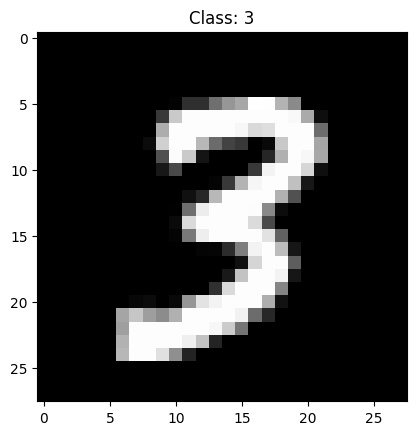

In [ ]:
# Melakukan pengecekan acak pada data
idx = np.random.randint(0, digits_data.shape[0])
plt.imshow(digits_data[idx], cmap='gray')
plt.title('Class: ' + str(digits_labels[idx]))

<Axes: xlabel='Labels', ylabel='count'>

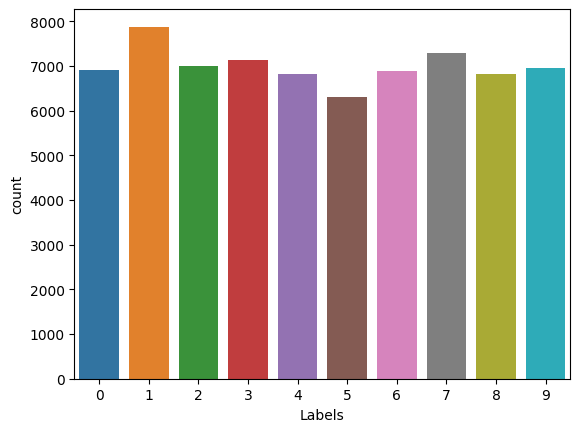

In [ ]:
# Cek distribusi data
df_labels = pd.DataFrame(digits_labels, columns=['Labels'])
sns.countplot(df_labels, x='Labels')

## Load Kaggle A-Z

In [ ]:
# Mendownload dataset A-Z
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

--2023-12-05 02:52:59--  https://iaexpert.academy/arquivos/alfabeto_A-Z.zip
Resolving iaexpert.academy (iaexpert.academy)... 162.159.134.42
Connecting to iaexpert.academy (iaexpert.academy)|162.159.134.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 193643888 (185M) [application/zip]
Saving to: ‘alfabeto_A-Z.zip’

alfabeto_A-Z.zip    100%[===================>] 184.67M  58.1MB/s    in 3.3s    

2023-12-05 02:53:03 (55.6 MB/s) - ‘alfabeto_A-Z.zip’ saved [193643888/193643888]



In [ ]:
# Melakukan ekstrak file zip
zip_object = zipfile.ZipFile(file = 'alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
# Memuat dataset A-Z
dataset_az = pd.read_csv('A_Z Handwritten Data.csv').astype('float32')
dataset_az

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Mengambil data piksel saja
alphabet_data = dataset_az.drop('0', axis=1)
# Mengambil data label saja
alphabet_labels = dataset_az['0']

In [ ]:
# Mengecek bentuk data
alphabet_data.shape, alphabet_labels.shape

((372450, 784), (372450,))

In [ ]:
# Mengecek bentuk label
alphabet_labels.shape

(372450,)

In [ ]:
# Mengubah bentuk data piksel menjadi 28x28
alphabet_data = np.reshape(alphabet_data.values, (alphabet_data.shape[0], 28, 28))
# Cek hasilnya berdasarkan bentuknya
alphabet_data.shape

(372450, 28, 28)

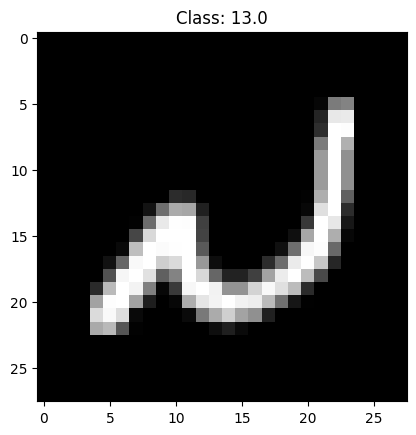

In [ ]:
# Mengecek dataset A-Z secara acak
index = np.random.randint(0, alphabet_data.shape[0])
plt.imshow(alphabet_data[index], cmap = 'gray')
plt.title('Class: ' + str(alphabet_labels[index]));

<Axes: xlabel='Labels', ylabel='count'>

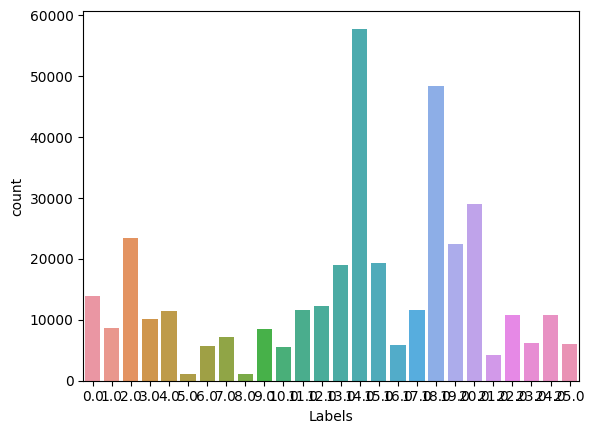

In [ ]:
# Cek distribusi data A-Z
df_az_labels = pd.DataFrame({
    'Labels': alphabet_labels.values
})
sns.countplot(df_az_labels, x='Labels')

## Combine Dataset (MNIST + Kaggel A-Z)

In [ ]:
# Cek nilai unik dari digits_labels dan alphabet_labels
np.unique(digits_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Check unique value from alphabet_labels
np.unique(alphabet_labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
      dtype=float32)

In [ ]:
# We already know that digits labels containt labels from 0-9 (10 labels)
# We also know that alphabet labels start from 0-25 which represent A-Z
# If we want to combine them, the A-Z labels should continuing the digits label

# Menambahkan 10 ke label A-Z
alphabet_labels += 10

In [ ]:
# Mengecek kembali label alphabet
np.unique(alphabet_labels)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35.],
      dtype=float32)

In [ ]:
# Menggabungkan keduanya
data = np.vstack([alphabet_data, digits_data])
labels = np.hstack([alphabet_labels, digits_labels])

In [ ]:
# Mengecek bentuknya
data.shape, labels.shape

((442450, 28, 28), (442450,))

In [ ]:
# Mengecek labelnya
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.], dtype=float32)

In [ ]:
# Mengonversi data menjadi float32
data = np.array(data, dtype = 'float32')

In [ ]:
# Karena Convolutional memerlukan data 3d dan gambar hanya dalam data 2d (karena format grayscale), maka perlu menambahkan "depth" ke data
data = np.expand_dims(data, axis=-1)

# Cek bentuknya
data.shape

(442450, 28, 28, 1)

# Preprocessing

In [ ]:
# Melakukan normalisasi data
data /= 255.0

In [ ]:
# Mengecek rentang nilai data
data[0].min(), data[0].max()

(0.0, 1.0)

In [ ]:
# Mengkodekan label
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
# Cek bentuk label
labels.shape

(442450, 36)

Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

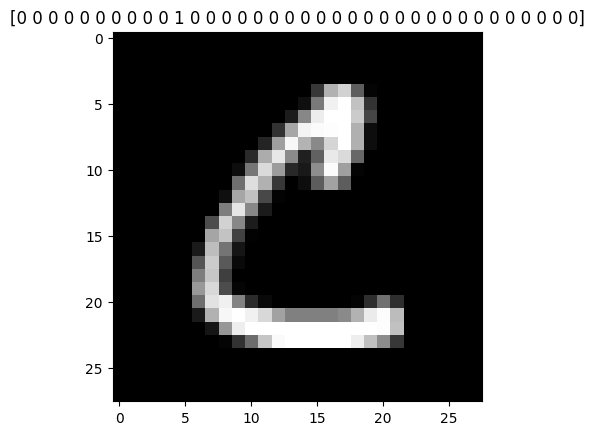

In [ ]:
# Cek data dengan label binarizer's
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[0]))

In [ ]:
# Karena data tidak seimbang, maka cara menangani hal ini dengan memberikan bobot untuk data kecil

# Cek jumlah data untuk setiap label terlebih dahulu
classes_total = labels.sum(axis = 0)
classes_total

array([ 6903,  7877,  6990,  7141,  6824,  6313,  6876,  7293,  6825,
        6958, 13869,  8668, 23409, 10134, 11440,  1163,  5762,  7218,
        1120,  8493,  5603, 11586, 12336, 19010, 57825, 19341,  5812,
       11566, 48419, 22495, 29008,  4182, 10784,  6272, 10859,  6076])

In [ ]:
# Cek nilai terbesar dari data
classes_total.max()

57825

In [ ]:
# Membuat bobot untuk setiap data
classes_weights = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_weights[i] = classes_total.max() / classes_total[i]

# Cek bobot untuk setiap data
classes_weights

{0: 8.376792698826597,
 1: 7.340992763742541,
 2: 8.272532188841202,
 3: 8.097605377398123,
 4: 8.473769050410317,
 5: 9.15967052114684,
 6: 8.409685863874346,
 7: 7.928835870012341,
 8: 8.472527472527473,
 9: 8.310577752227651,
 10: 4.169370538611291,
 11: 6.671089063221043,
 12: 2.4702037677816224,
 13: 5.7060390763765545,
 14: 5.0546328671328675,
 15: 49.72055030094583,
 16: 10.035577924331829,
 17: 8.011221945137157,
 18: 51.629464285714285,
 19: 6.808548216178029,
 20: 10.320364090665715,
 21: 4.990937338166753,
 22: 4.6875,
 23: 3.0418200946870066,
 24: 1.0,
 25: 2.989762680316426,
 26: 9.94924294562973,
 27: 4.999567698426422,
 28: 1.1942625828703608,
 29: 2.5705712380529007,
 30: 1.993415609487038,
 31: 13.827116212338593,
 32: 5.362110534124629,
 33: 9.21954719387755,
 34: 5.3250759738465785,
 35: 9.51695194206715}

# Split Data to Train and Test

In [ ]:
# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 1, stratify = labels)

## Create Data Augmentation

In [ ]:
# Mengimpor library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Augmentasi gambar
augmentation = ImageDataGenerator(rotation_range = 10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Build CNN Model

In [ ]:
# Mengimpor library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Membangun jaringan
# Membuat model Sequential untuk menyusun lapisan-lapisan secara berurutan
network = Sequential()

# Menambahkan lapisan konvolusi (Conv2D) pertama dengan 32 filter, kernel size 3x3, aktivasi ReLU, dan input shape 28x28x1
network.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Menambahkan lapisan max pooling (MaxPool2D) dengan pool size 2x2
network.add(MaxPool2D(pool_size=(2, 2)))

# Menambahkan lapisan konvolusi (Conv2D) kedua dengan 64 filter, kernel size 3x3, aktivasi ReLU, dan padding 'same'
network.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))

# Menambahkan lapisan max pooling (MaxPool2D) dengan pool size 2x2
network.add(MaxPool2D(pool_size=(2, 2)))

# Menambahkan lapisan konvolusi (Conv2D) ketiga dengan 128 filter, kernel size 3x3, aktivasi ReLU, dan padding 'valid'
network.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))

# Menambahkan lapisan max pooling (MaxPool2D) dengan pool size 2x2
network.add(MaxPool2D(pool_size=(2, 2)))

# Meratakan data menjadi vektor satu dimensi
network.add(Flatten())

# Menambahkan lapisan dense (fully connected) dengan 64 neuron dan aktivasi ReLU
network.add(Dense(64, activation='relu'))

# Menambahkan lapisan dense (fully connected) dengan 128 neuron dan aktivasi ReLU
network.add(Dense(128, activation='relu'))

# Menambahkan lapisan output dengan 36 neuron (sesuai jumlah kelas) dan aktivasi softmax
network.add(Dense(36, activation='softmax'))

# Mengkompilasi model dengan menggunakan categorical crossentropy sebagai fungsi loss, optimizer Adam, dan metrik akurasi
network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Cek summary jaringan
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [ ]:
# Mendefinisikan nama-nama label kelas yang sesuai dengan output layer
name_labels = '0123456789'
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

# Mencetak nama-nama label kelas
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## Train model

In [ ]:
# Menetapkan nama model, epoch, dan ukuran batch
file_model = 'custom_ocr.model'
epochs = 20
batch_size = 128

In [ ]:
# Menyiapkan checkpoint
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [ ]:
# Melatih model
history = network.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                      validation_data = (X_test, y_test),
                      steps_per_epoch = len(X_train) // batch_size, epochs=epochs,
                      class_weight = classes_weights, verbose=1, callbacks=[checkpointer])

Epoch 1/20
2765/2765 [==============================] - ETA: 0s - loss: 2.2423 - accuracy: 0.8209
Epoch 1: val_loss improved from inf to 0.22540, saving model to custom_ocr.model
2765/2765 [==============================] - 191s 65ms/step - loss: 2.2423 - accuracy: 0.8209 - val_loss: 0.2254 - val_accuracy: 0.9273
Epoch 2/20
2764/2765 [============================>.] - ETA: 0s - loss: 1.0106 - accuracy: 0.8984
Epoch 2: val_loss improved from 0.22540 to 0.19303, saving model to custom_ocr.model
2765/2765 [==============================] - 179s 65ms/step - loss: 1.0103 - accuracy: 0.8985 - val_loss: 0.1930 - val_accuracy: 0.9306
Epoch 3/20
2765/2765 [==============================] - ETA: 0s - loss: 0.8396 - accuracy: 0.9114
Epoch 3: val_loss did not improve from 0.19303
2765/2765 [==============================] - 177s 64ms/step - loss: 0.8396 - accuracy: 0.9114 - val_loss: 0.2119 - val_accuracy: 0.9089
Epoch 4/20
2765/2765 [==============================] - ETA: 0s - loss: 0.7433 - accu

# Evaluate Model

## Make a Single Prediction

In [ ]:
# Melakukan prediksi
predictions = network.predict(X_test, batch_size=batch_size)

692/692 [==============================] - 2s 3ms/step


In [ ]:
# Cek prediksi untuk data-0
# hal ini akan mendapatkan probabilitas untuk setiap label
# Yang tertinggi adalah prediksi
predictions[1]

array([1.19967025e-19, 6.61424110e-11, 5.09967409e-16, 8.05100232e-22,
       2.11761281e-16, 5.05733259e-13, 2.72948320e-15, 3.07523729e-16,
       2.44111666e-16, 1.13117685e-19, 4.69094589e-17, 2.49251067e-18,
       1.04187140e-13, 2.11425414e-13, 6.04980101e-16, 4.00908012e-14,
       1.49269218e-15, 2.00620939e-15, 9.99908447e-01, 9.15874116e-05,
       4.77016430e-13, 2.95780067e-11, 2.14008106e-18, 3.76536333e-14,
       2.82236149e-13, 3.43815063e-19, 7.77452013e-19, 1.73641160e-19,
       1.40421052e-12, 1.91700456e-09, 8.13029250e-14, 5.15642792e-14,
       2.50054248e-15, 1.02184456e-13, 3.95728426e-13, 1.18497443e-12],
      dtype=float32)

In [ ]:
# mendapatkan prediksi aktual -> probabilitas tertinggi
np.argmax(predictions[1])

18

In [ ]:
# Cek label untuk 24
name_labels[18]

'I'

In [ ]:
# Cek y_test label untuk 0
y_test[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Cek nilai tertinggi
np.argmax(y_test[1])

18

In [ ]:
# Cek label y_test 0
name_labels[np.argmax(y_test[18])]

'S'

## Make an Evaluation on Test Data

In [ ]:
# Evaluasi pada data pengujian
network.evaluate(X_test, y_test)

2766/2766 [==============================] - 9s 3ms/step - loss: 0.1706 - accuracy: 0.9400


[0.17056019604206085, 0.9400497078895569]

In [ ]:
# Cetak Laporan Klasifikasi
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names = name_labels))

              precision    recall  f1-score   support

           0       0.38      0.63      0.48      1381
           1       0.95      1.00      0.97      1575
           2       0.92      0.98      0.95      1398
           3       0.93      1.00      0.96      1428
           4       0.91      0.97      0.94      1365
           5       0.44      0.96      0.61      1263
           6       0.93      0.98      0.96      1375
           7       0.96      0.98      0.97      1459
           8       0.95      0.99      0.97      1365
           9       0.97      0.98      0.97      1392
           A       0.99      0.97      0.98      2774
           B       0.99      0.98      0.98      1734
           C       1.00      0.98      0.99      4682
           D       0.92      0.97      0.95      2027
           E       0.99      0.98      0.99      2288
           F       0.95      1.00      0.97       233
           G       0.96      0.94      0.95      1152
           H       0.95    

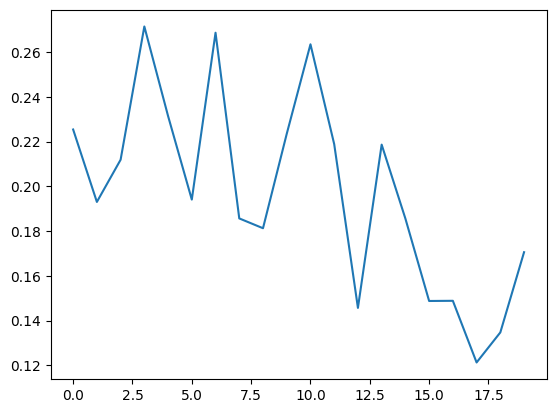

In [ ]:
# Visualisasikan nilai kerugian untuk setiap epoch
plt.plot(history.history['val_loss'])

In [ ]:
# Memeriksa metrik lainnya
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

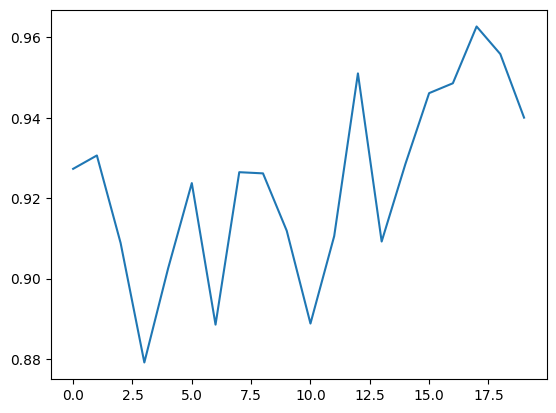

In [ ]:
# Memeriksa kinerja model dengan akurasi validasi
plt.plot(history.history['val_accuracy'])

# Save The Model

In [ ]:
# Hasilnya akan ditampilkan dalam direktori colab
network.save('network', save_format= 'h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing on Real Image

In [ ]:
# Mengimpor model yang telah disimpan
from tensorflow.keras.models import load_model

In [ ]:
# Memuat model yang disimpan
load_network = load_model('network')

In [ ]:
# Mengecek summary
load_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

Mounted at /content/drive/


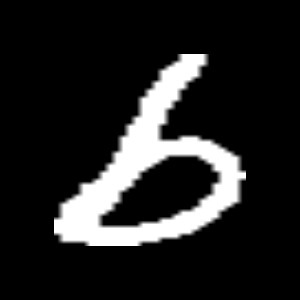

In [ ]:
# Memuat gambar
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive/') # melakukan mount drive
img = cv2.imread('/content/drive/MyDrive/Datasets/6.jpg') # Mengambil gambar
cv2_imshow(img) # menampilkan gambar

In [ ]:
# Cek bentuk
img.shape

(300, 300, 3)

In [ ]:
# Konversi menjadi grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mengecek bentuk
gray_img.shape

(300, 300)

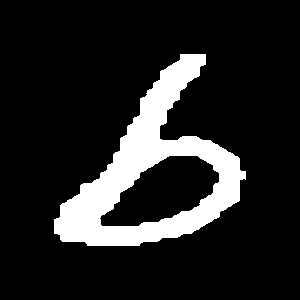

120.0


In [ ]:
# Pra-pemrosesan
# Melakukan Binary Threshold dan Otsu
value, thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

cv2_imshow(thresh)

# print nilai threshold
print(value)

In [ ]:
# Resize image agar sesuai dengan bentuk input jaringan 28x28
img_resize = cv2.resize(gray_img, (28,28))
cv2_imshow(img_resize)

In [ ]:
# Konversi menjadi float32 dan menambahkan dimensi karena bentuk input jaringan adalah 28x28x1
img_input = img_resize.astype('float32') / 255 # juga melakukan normalisasi
img_input = np.expand_dims(img_input, axis=-1) # memasukkan kedalaman

# Mengecek bentuk image
img_input.shape

(28, 28, 1)

In [ ]:
# Menambahkan "jumlah data" sebagai dimensi
img_input = np.reshape(img_input, (1,28,28,1))
img_input.shape

(1, 28, 28, 1)

In [ ]:
# Melakukan prediksi
prediction = load_network.predict(img_input)
pred_label = np.argmax(prediction) # prediksi label aktual
pred_label

1/1 [==============================] - 1s 724ms/step


6

In [ ]:
# Cek label untuk 6
name_labels[6]

'6'

##Analisis

Setelah melatih model CNN, dari hasil yang didapat meskipun saya mendapat hasil accuracy sebesar 0.94, hasil prediksi masih kurang tepat terhadap image b_small karena pada gambar b terlihat mirip seperti angka 6, jadi model memprediksi berdasarkan nama_labels indeks 6 yang memiliki value 6